Introduction:

This tutorial is created for the incoming 4th year software development students to understand how to work with machine learning algorithms using this tutorial as a guide. We will work through the whole process from setting up the environment to working with the data set and performing machine learning on the dataset. I will go through each step as simply as possible to make it understandable to any one who might struggle with this type of technology.

------------------------------------------------------------------------------------------------------------------

Setting up Jupyter Notebook:

If you do not have jupyter notebook already installed then follow these videos as a guide to setting it up.

For Windows: https://www.youtube.com/watch?v=otmWEEFysms

For Ubuntu: https://www.youtube.com/watch?v=eY4JFm74oi4&t=8s

For Mac: https://www.youtube.com/watch?v=daVgEXjv6DE

------------------------------------------------------------------------------------------------------------------

Neural networks:

In this tutorial I will be using neural networks as the machine learning algorithm. I chose neural networks as they are great for a number of different projects. With my tutorial i will be using it to help get the air pollution based off locatiom in seoul in south korea. 

They are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input.  Works best with numerical data contained in vectors which will be useful to us as, we will be working with the air pollution numbers given to us from the data set.

For a more detailed explanation of Neural Networks click on the link below:

https://www.youtube.com/watch?v=aircAruvnKk

------------------------------------------------------------------------------------------------------------------

Data Set:

The data set that we will be using in this tutorial will be the information gathered on air pollution in seoul in south korea over a number of years.

https://www.kaggle.com/bappekim/air-pollution-in-seoul/data

The data was gathered between the period of 2017 and 2019

It gathers information based on how well the instrumentation used was working and checks for a number of different pollutanats.

------------------------------------------------------------------------------------------------------------------

Setting the Imports:

Initially we will start installing the dependencies and imports needed to carry out this project.

Pandas:

will be used as dataframes for our tutorial as it is great for searching through collumns and rows and makes it easier to view.
To install pandas enter this command into your terminal - sudo pip install pandas

Seaborn:

Is used to sit on top of matplotlib graphs and create a visaully appealing graph.
To install seaborn enter this command - sudo pip install seaborn

Scikit-Learn:

This is the library that contains all the machinelearning algorithms and functions for classifying the data.
To install just enter the command - sudo pip install scikit-learn

scikit learn has a lot of features some of which we will be using is: neural networks as the actual algorithm, then will be performing the confusion matrix onto the resulting classification, along with a classsification report. For the preproccessing we will use standard scaler and then with model selection we will be using train_test_split.

So then we will import all these into our notebook as follows

------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

------------------------------------------------------------------------------------------------------------------

The line below is where we are loading in our dataset into the notebook and assigning it a variable air, that will make it easier to type rather that measurement_summary.

Then with the function .head() we can display the first 5 rows to show what exactly is in the data set and what we can do with it.

air.info() 

shows us what the types of values that are stored in the dataset. From here we can see that all the values in the set are not-null values and so there will be no empty rows or collumns and this is a great help as it will provide us with a more accurate score when it comes to performing our classification. 

If we were to be presented with fields that might contain null values it would of been in our best interest to remove all those null values using pandas functions to remove them.

In [2]:
air = pd.read_csv('Measurement_summary.csv',sep=',')

In [3]:
air.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0


In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 11 columns):
Measurement date    647511 non-null object
Station code        647511 non-null int64
Address             647511 non-null object
Latitude            647511 non-null float64
Longitude           647511 non-null float64
SO2                 647511 non-null float64
NO2                 647511 non-null float64
O3                  647511 non-null float64
CO                  647511 non-null float64
PM10                647511 non-null float64
PM2.5               647511 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 54.3+ MB


------------------------------------------------------------------------------------------------------------------

Next we are moving on to finding the quality with regards Sulphur dioxide or SO2. I did this by binning the data into two categories being good and bad.  THe good data will be anything lower than 0.005 and the bad data being all the values above and between 0.005 - 0.04, this is how the sulphur dioxide was measured in South Korea at the time. doing this will give a better indication as to the quality of air in certains parts of Seoul. 

I have grouped the names into 'Bad' and 'good', then cut the values into these two bins. LabelEncoder is used to transform the labels from their numericaal values to the binary equivalent 1 and 0 which has been set by our metric and will make it easier to classify. Then its is just a matter of setting the new binary values back into the dataset to be viewed using the head function.

Then when we have this done we can then proceed to plot this sulphur dioxide good and bad into an easy to read graph to see the exact extent of the air pollution with regard sulphur dioxide.

In [5]:
bins = (-1.000, 0.004, 0.372)
group_names = ['bad', 'good']
air['SO2'] = pd.cut(air['SO2'], bins = bins, labels = group_names)
air['SO2'].unique()

[bad, good, NaN]
Categories (2, object): [bad < good]

In [6]:
label_SO2 = LabelEncoder()

In [7]:
air['SO2'] = label_SO2.fit_transform(air['SO2'])

In [8]:
air.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,1,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,1,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,1,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,1,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,1,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,1,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,1,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,1,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,1,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,1,0.047,0.002,1.1,74.0,63.0


In [9]:
#Runnig this will show just how many fields are good and bad in a simple count.
air['SO2'].value_counts()

1    394218
2    249310
0      3983
Name: SO2, dtype: int64

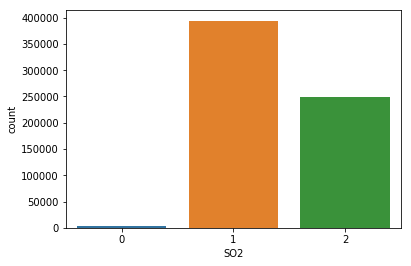

In [10]:
sns.countplot(air['SO2'])

In [11]:
X = air.drop('SO2', axis=1)
y = air['SO2']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [14]:
X_train[:10]

,Measurement date,Station code,Address,Latitude,Longitude,NO2,O3,CO,PM10,PM2.5
642544,2019-06-03 16:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.018,0.069,0.4,48.0,33.0
37062,2018-04-10 21:00,102,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676,0.016,0.035,0.3,28.0,11.0
335548,2019-11-13 23:00,113,"34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...",37.654192,127.029088,0.009,0.028,0.3,7.0,6.0
251112,2019-01-21 19:00,110,"369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...",37.584848,127.094023,0.045,0.005,0.7,57.0,30.0
507481,2018-10-04 03:00,120,"6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Repub...",37.480917,126.971481,0.031,0.011,0.5,25.0,13.0
607504,2018-05-07 18:00,124,"236, Baekjegobun-ro, Songpa-gu, Seoul, Republi...",37.502686,127.092509,0.019,0.050,0.5,52.0,25.0
563912,2019-04-24 11:00,122,"16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...",37.504547,126.994458,0.037,0.018,0.3,80.0,63.0
350368,2018-07-24 23:00,114,"17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republ...",37.658774,127.068505,0.038,0.024,0.5,62.0,48.0
195213,2018-08-03 21:00,108,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493,0.025,0.022,0.6,33.0,22.0
533320,2018-10-01 20:00,121,"14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...",37.487355,126.927102,0.015,0.027,0.3,25.0,20.0


In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: invalid literal for float(): 2019-06-03 16:00

In [17]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=50)
mlpc.fit(X_train, y_train)
pred_mlpc= mlpc.predict(X_test)

ValueError: invalid literal for float(): 2019-06-03 16:00